In [58]:
### This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [59]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score


In [60]:
import io 
from PIL import Image
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Train Test Split Folder path


In [61]:
x_train = []
y_train = []

image_size = 150

labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size,image_size))
        x_train.append(img)
        y_train.append(i)
        
        
for i in labels:
    folderPath = os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size,image_size))
        x_train.append(img)
        y_train.append(i)
    
x_train = np.array(x_train) 
y_train = np.array(y_train)
    

In [62]:
x_train,y_train = shuffle(x_train, y_train,random_state = 101)
x_train.shape

(3264, 150, 150, 3)

Train Test Split Training

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.1, random_state = 101)

In [64]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Convolutional Neural Network

In [65]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3,3),activation = 'relu'))
model.add(Conv2D(256, (3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(4,activation = 'softmax'))



In [66]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [68]:
history = model.fit(x_train,y_train,epochs=20,validation_split =0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.2657 - loss: 5.6506 - val_accuracy: 0.2891 - val_loss: 1.3585
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.3467 - loss: 1.3009 - val_accuracy: 0.5068 - val_loss: 1.1484
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5200 - loss: 1.0765 - val_accuracy: 0.5884 - val_loss: 1.0586
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.5875 - loss: 0.9585 - val_accuracy: 0.6361 - val_loss: 0.8657
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6593 - loss: 0.8131 - val_accuracy: 0.6667 - val_loss: 0.7874
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.6785 - loss: 0.7490 - val_accuracy: 0.8027 - val_loss: 0.5457
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7449 - loss: 0.6539 - val_accuracy: 0.8095 - val_loss: 0.4860
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7875 - loss: 0.5281 - val_accuracy: 0.7517 -

In [69]:
# Save model
model.save('brain_tumor_classifier.h5')

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

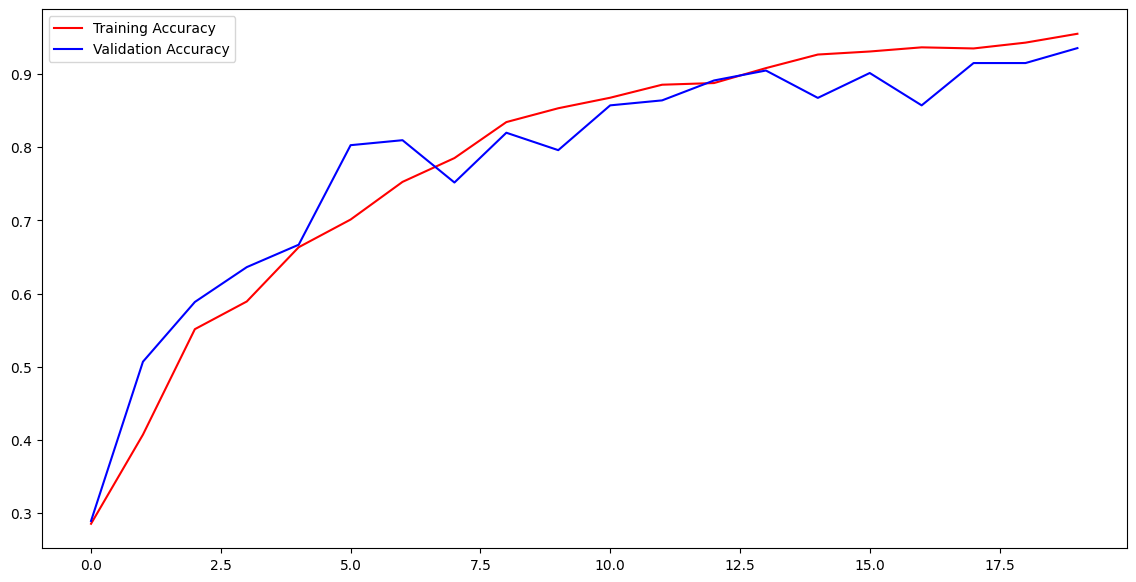

In [71]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,acc,'r', label = 'Training Accuracy')
plt.plot(epochs,val_acc,'b', label = 'Validation Accuracy')
plt.legend(loc='upper left')
plt.show()


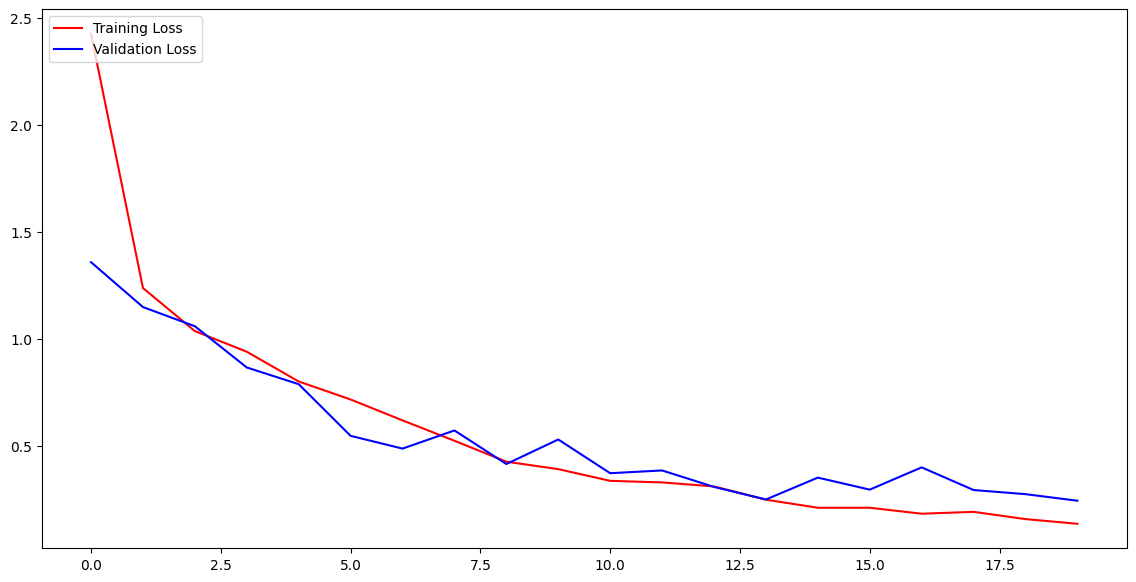

In [72]:
model.save('brain_afmtumor.h5')
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize = (14,7))
plt.plot(epochs,loss,'r', label = 'Training Loss')
plt.plot(epochs,val_loss,'b', label = 'Validation Loss')
plt.legend(loc='upper left')
plt.show()


Prediction

In [73]:
def pred(img_add):
    img = cv2.imread(img_add)
    img = cv2.resize(img,(150,150))
    
    img_array = np.array(img)
    print(img_array.shape)
    img_array = img.reshape(1,150,150,3)
    a = model.predict(img_array)
    indices = a.argmax()

    if indices == 0:
        return "Glioma Tumor"
    elif indices == 1:
        return "Meningioma Tumor"
    elif indices == 2:
        return "No Tumor"
    elif indices == 3:
        return "Pituitary Tumor"
    else:
        return "Wrong_Choice!"

In [74]:
#Same dataset
#img_add = '/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(12).jpg'

# Internet Images
#img_add = '/kaggle/input/brain-tumor-internet/internet images/no.jpg'
#img_add = '/kaggle/input/brain-tumor-internet/internet images/meningioma.jpg'
#img_add = '/kaggle/input/brain-tumor-internet/internet images/glioma.jpg'


#Diff dataset
#img_add = '/kaggle/input/brain-tumor-mri-dataset/Testing/meningioma/Te-meTr_0000.jpg'
#img_add = '/kaggle/input/brain-tumor-mri-dataset/Testing/glioma/Te-gl_0019.jpg'
#img_add = '/kaggle/input/brain-tumor-mri-dataset/Testing/notumor/Te-no_0018.jpg'
img_add = '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-pi_0021.jpg'
out = pred(img_add)
print(out)


(150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Pituitary Tumor


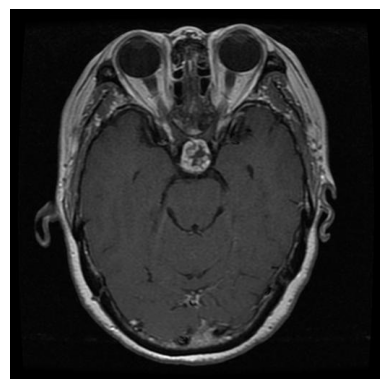

In [75]:
from tensorflow.keras.preprocessing import image
img = image.load_img(img_add)
plt.axis('off')
plt.imshow(img)